### Diamonds Practice

## Features Overview
* **Carat : ** Carat weight of the Diamond.
* **Cut : ** Describe cut quality of the diamond.
> * Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* **Color : ** Color of the Diamond.
> * With D being the best and J the worst.
* **Clarity : ** Diamond Clarity refers to the absence of the Inclusions and Blemishes.
> * (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* **Depth : ** The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* **Table : ** The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* **Price : ** the Price of the Diamond.
* **X : ** Length of the Diamond in mm.
* **Y : ** Width of the Diamond in mm.
* **Z : ** Height of the Diamond in mm.

*Qualitative Features (Categorical) : Cut, Color, Clarity. *

*Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.*


### Price is the Target Variable.



![](https://i.imgur.com/Bbf0GWk.jpg)

In [ ]:
import pandas as pd

In [ ]:

df = pd.read_csv('diamonds.csv')
diamonds = df.copy()

In [ ]:
df.head(100)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.70,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38
96,97,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
97,98,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
98,99,0.73,Very Good,E,SI1,61.6,59.0,2760,5.77,5.78,3.56


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Practice

Replace the non numerical data with numeric data
1. Use solution (diamonds-in-depth-analysis notebook) in order to detmine if the data is categorical or ordinal
2. Replace with appropriate values (if the data is ordinal, replace with the required order)
3. If there were missing values in these columns, what would you replace it with? (use slide 43 to determine)

In [ ]:
df.cut.unique().tolist()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

Ideal - 1
Premium - 2
Very Good - 3
Good - 4
Fair - 5

#### Solution

Data is ordinal since it can be ordered 

##### first approuch - replace values

In [ ]:
df["cut"].replace({"Ideal": 1, "Premium": 2, ...}, inplace=True)

SyntaxError: invalid syntax (<ipython-input-56-1fd328891701>, line 1)

##### Second Approuch - Label Encoding

Use Panda's category data type in order to cast strings to numeric values
The nice aspect of this approach is that you get the benefits of pandas categories (compact data size, ability to order, plotting support) but can easily be converted to numeric values for further analysis.

In [ ]:
# convert a column to a category, then use those category values for your label encoding
df['cut']  = df['cut'].astype('category')
df.dtypes

In [ ]:
df['cut'].cat.codes

In [ ]:
# the values remains the same but they have a corresponding numeric value 
df['cut']

In [ ]:
df['cut'].dtype

In [ ]:
# The values are not ordered correctly. Let's change that
from pandas.api.types import CategoricalDtype
cd = CategoricalDtype(categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
df['cut']  = df['cut'].astype(cd)

In [ ]:
df['cut'].dtype

In [1]:
df['cut_codes'] = df['cut'].cat.codes
df['cut_codes']

NameError: ignored

In [ ]:
import seaborn as sns

In [ ]:
sns.countplot(df['cut'])

In [ ]:
sns.catplot(x='cut', y='price', data=df, kind='box')

TODO Apply similar behavior to the other categorical features

TODO review Plotting with categorical data: https://seaborn.pydata.org/tutorial/categorical.html


##### Third Approuch - Use get_dummies (for nominal data only)

If the data was nominal, we could use pandas get_dummies in order to convert it.
For this purpuse, let's assume color is nomimal.

In [ ]:
df['color'].value_counts()

In [ ]:
pd.get_dummies(df['color'])

In case there are only two options, you can use remove_first=True param, since one column is the opposite of the other, and therefore the data is duplicate
You can also handle null values by using dummy_na parameter (in this case we have no null values)

In [ ]:
# apply for the entire data set
df = pd.get_dummies(df, columns=['color'], drop_first=False, dummy_na=False)

In [ ]:
df

,Unnamed: 0,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,2,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,3,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,4,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,5,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53936,53937,0.72,Good,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53937,53938,0.70,Very Good,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53938,53939,0.86,Premium,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


##### Forth Approuch - Custom Encoding

In [ ]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Some information about clarity:
How clarity affects price (taken from [link](https://www.diamondmansion.com/blog/understanding-how-diamond-clarity-affects-value))

<table id="tablepress-1" class="tablepress tablepress-id-1">
<thead>
<tr class="row-1 odd">
<th class="column-1">Clarity Increase</th><th class="column-2">Approx. Price Increase (%)</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
<td class="column-1">SI2-SI1</td><td class="column-2">12%</td>
</tr>
<tr class="row-3 odd">
<td class="column-1">SI1-VS2</td><td class="column-2">22%</td>
</tr>
<tr class="row-4 even">
<td class="column-1">VS2-VS1</td><td class="column-2">9%</td>
</tr>
<tr class="row-5 odd">
<td class="column-1">VS1-VVS2</td><td class="column-2">13%</td>
</tr>
<tr class="row-6 even">
<td class="column-1">VVS2-VVS1</td><td class="column-2">28%</td>
</tr>
<tr class="row-7 odd">
<td class="column-1">VVS1-IF</td><td class="column-2">22%</td>
</tr>
</tbody>
</table>

Cool Trick! Convert HTML table into dataframe object

In [ ]:
a = """
<table id="tablepress-1" class="tablepress tablepress-id-1">
<thead>
<tr class="row-1 odd">
<th class="column-1">Clarity Increase</th><th class="column-2">Approx. Price Increase (%)</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
<td class="column-1">SI2-SI1</td><td class="column-2">12%</td>
</tr>
<tr class="row-3 odd">
<td class="column-1">SI1-VS2</td><td class="column-2">22%</td>
</tr>
<tr class="row-4 even">
<td class="column-1">VS2-VS1</td><td class="column-2">9%</td>
</tr>
<tr class="row-5 odd">
<td class="column-1">VS1-VVS2</td><td class="column-2">13%</td>
</tr>
<tr class="row-6 even">
<td class="column-1">VVS2-VVS1</td><td class="column-2">28%</td>
</tr>
<tr class="row-7 odd">
<td class="column-1">VVS1-IF</td><td class="column-2">22%</td>
</tr>
</tbody>
</table>"""

In [ ]:
df_clarity = pd.read_html(a)[0]
df_clarity['Clarity Increase'] = ["SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1"]
df_clarity

,Clarity Increase,Approx. Price Increase (%)
0,SI2,12%
1,SI1,22%
2,VS2,9%
3,VS1,13%
4,VVS2,28%
5,VVS1,22%


In [ ]:
# Adding missing value
df_clarity.iloc[6] = ['IF', 22]
df_clarity.index = range(0,7)

In [ ]:
df_clarity['price_increase'] = df_clarity['Approx. Price Increase (%)'].apply(lambda x: x.replace("%","")).astype(int)

In [ ]:
df_clarity

,Clarity Increase,price_increase
0,VS2,9
1,SI2,12
2,VS1,13
3,SI1,22
4,VVS1,22
5,VVS2,28
6,IF,22


In [ ]:
df_clarity.drop('Approx. Price Increase (%)', inplace=True, axis=1)

In [ ]:
df_clarity.sort_values(['price_increase'], inplace=True)
df_clarity

,Clarity Increase,price_increase
0,VS2,9
1,SI2,12
2,VS1,13
3,SI1,22
4,VVS1,22
6,IF,22
5,VVS2,28


In [ ]:
import numpy as np

In [ ]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
# let's assume we would like to tage all clarity types which cause >20% price increase. 
# We can create a new feature which will hold this data 
df["high_quality_clarity"] = np.where(np.isin(df["clarity"],['SI1', 'VVS1', 'IF', 'VVS2']), 1, 0)

df['high_quality_clarity'].value_counts()

0    30364
1    23576
Name: high_quality_clarity, dtype: int64

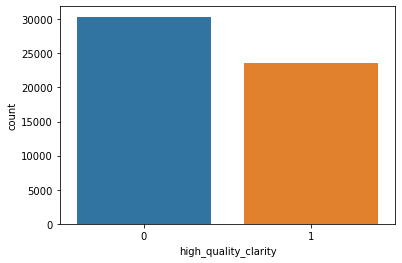

In [ ]:
sns.countplot(df['high_quality_clarity'])

### Practice 2

In corrdemo.csv (uploaded to drive), find correlations between the different features. Use both heatmap and pairplot in order to explore the data

#### Solution

Check 'Correlation' notebook in the drive for solution

### Practice 3

In dataclean.csv (uploaded to drive), fill the missing values. Use seaborn's distplot graph in order to check the data distribution.

#### Solution

Check 'Data clean' notebook in the drive for solution